In [ ]:
#Telecom Project Segmentation

In [1]:
#Importing the required modules
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
from sklearn.preprocessing import Imputer, LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import datetime
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, average_precision_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
import xgboost
%matplotlib inline

In [27]:
provideddata = pd.ExcelFile('C:\\Data_Science\\Certifications\\AnalytixLabs\\Python\\Final Projects\\Project_Solutions_Git_Original\\TelecomProject-master\\ProvidedData.xlsx')
active=pd.read_excel(provideddata,sheet_name=0)
churned=pd.read_excel(provideddata,sheet_name=1)

In [28]:
activedata=active.copy()
churneddata=churned.copy()

In [29]:
activedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
SITE_ACCOUNT_NUMBER          9998 non-null object
ACCOUNT_STATUS               9998 non-null object
FIRST_COMMUNICATION_DATE     9989 non-null datetime64[ns]
UPGRADE_DATE                 9989 non-null datetime64[ns]
SERVICE_ PLAN                8760 non-null object
MODEL                        9323 non-null object
SALES_CHANNEL                7093 non-null object
DIRECT_INDIRECT_CHANNEL      9954 non-null object
SALES_SOURCE                 9306 non-null object
COMPANY_SOURCE_NAME          9988 non-null object
FIRST_NAME                   9998 non-null object
LAST_NAME                    9998 non-null object
ADDRESS                      9945 non-null object
CITY                         9998 non-null object
STATE                        9977 non-null object
ZIPCODE                      9977 non-null object
EMAIL_ADDRESS                9979 non-null object
FEEDBACK                   

In [30]:
activedata.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,UPGRADE_DATE,SERVICE_ PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,COMPANY_SOURCE_NAME,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-11112345,Active,2001-11-27,2003-12-14,NaN,HN9000,Vars,Indirect,UNKNOWN,HNS Customers,...,Broadband Remote,0,HN7000 Upgrade,2.0,1-5-1943,69,0,1.0,0.0,N
1,AMR-14837287,Active,2003-05-02,2006-08-08,Pro,HN7000S,Sales Agents,Indirect,NCC,HNS Customers,...,Spaceway,0,Retail,2.0,28-12-1969,43,4,1.0,0.0,N
2,AMR-14837803,Active,2001-01-28,2004-03-17,Power150,HN9000,Call Center,Indirect,NCC,HNS Customers,...,Broadband Remote,0,National Sales,2.0,20-7-1954,58,4,1.0,0.0,N
3,AMR-14837821,Active,2001-11-20,2005-03-27,Power150,DW6000,Sales Agents,Direct,NaN,HNS Customers,...,Spaceway,0,Direct,NaN,10-5-1990,22,6,1.0,1.0,NaN
4,AMR-14839297,Active,2002-02-27,2004-06-14,Home,HN7000S,Call Center,Indirect,TAG,HNS Customers,...,Broadband Remote,0,DW6000 Upgrade,1.0,11-5-1976,36,7,0.0,0.0,NaN


In [31]:
activedata.describe()

,GENDER,MARITAL_STATUS,PRESENCE_OF_CHILDREN
count,8728.000000,9680.000000,8684.000000
mean,1.454056,0.572521,0.235030
std,0.497913,0.592780,0.424042
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,2.000000,1.000000,0.000000
max,2.000000,2.000000,1.000000


In [32]:
churneddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
SITE_ACCOUNT_NUMBER          10000 non-null object
ACCOUNT_STATUS               9985 non-null object
FIRST_COMMUNICATION_DATE     10000 non-null datetime64[ns]
CHURN_DATE                   10000 non-null datetime64[ns]
UPGRADE_DATE                 9121 non-null datetime64[ns]
SERVICE_PLAN                 8518 non-null object
MODEL                        9290 non-null object
SALES_CHANNEL                7398 non-null object
DIRECT_INDIRECT_CHANNEL      9216 non-null object
SALES_SOURCE                 9710 non-null object
COMPANY_SOURCE_NAME          9992 non-null object
FIRST_NAME                   9974 non-null object
LAST_NAME                    9993 non-null object
ADDRESS                      9991 non-null object
CITY                         10000 non-null object
STATE                        9955 non-null object
ZIPCODE                      9955 non-null object
EMAIL_ADDRESS 

In [33]:
churneddata.describe()

,GENDER,AGE,PRESENCE_OF_CHILDREN
count,8762.000000,9992.000000,8748.00000
mean,1.431408,49.556545,0.38043
std,0.495301,14.271563,0.48552
min,1.000000,22.000000,0.00000
25%,1.000000,38.000000,0.00000
50%,1.000000,50.000000,0.00000
75%,2.000000,61.000000,1.00000
max,2.000000,90.000000,1.00000


In [34]:
churneddata.head()

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,FIRST_COMMUNICATION_DATE,CHURN_DATE,UPGRADE_DATE,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,...,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,DATE_OF_BIRTH,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER
0,AMR-53205840,Closed,2002-01-18,2006-04-02,2004-01-03,Professional,DW6000,NaN,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,2.0,27-10-1964,48.0,0,.,NaN,N
1,AMR-53383136,Closed,2002-01-02,2006-07-09,2004-07-28,SO,DW6000,Retail/Others,Indirect,ValueElectronics,...,Broadband Remote,NaN,National Sales,NaN,22-10-1965,47.0,5,0,0.0,Y
2,AMR-53608585,Closed,2002-01-06,2008-12-30,2005-04-27,NaN,DW6000,Retail/Others,Indirect,TAG,...,Broadband Remote,NaN,Direct,2.0,20-3-1951,61.0,8,1,0.0,Y
3,AMR-53610590,Closed,2002-01-05,2004-08-19,NaT,SO,DW4000,NaN,Indirect,TAG,...,Broadband Remote,NaN,Direct,1.0,27-3-1948,64.0,0,.,NaN,Y
4,AMR-53612154,Closed,2002-01-05,2006-08-17,2005-11-12,Professional,DW7000,Retail/Others,Indirect,Perfect 10,...,Broadband Remote,NaN,Dealer-Generated Sale,1.0,25-8-1956,56.0,6,0,0.0,N


In [35]:
#Dropping Columns

In [36]:
activedata.drop(['FIRST_COMMUNICATION_DATE','DATE_OF_BIRTH','EMAIL_ADDRESS','ADDRESS','FIRST_NAME','LAST_NAME','ZIPCODE','STATE','CITY','COMPANY_SOURCE_NAME'],axis=1,inplace=True)

In [37]:
churneddata.drop(['FIRST_COMMUNICATION_DATE','CHURN_DATE','DATE_OF_BIRTH','EMAIL_ADDRESS','ADDRESS','FIRST_NAME','LAST_NAME','ZIPCODE','STATE','CITY','COMPANY_SOURCE_NAME'],axis=1,inplace=True)

In [38]:
#Determining number of NULL values
activedata.isnull().sum().sort_values(ascending=False)

COMPUTER_OWNER               3055
SALES_CHANNEL                2906
FEEDBACK                     1914
PRESENCE_OF_CHILDREN         1315
GENDER                       1271
SERVICE_ PLAN                1239
WARRANTY_NAME                 957
SALES_SOURCE                  693
MODEL                         676
SATELLITE                     396
MARITAL_STATUS                319
INCOME                        318
DIRECT_INDIRECT_CHANNEL        45
SITE_TYPE_DESC                 11
UPGRADE_DATE                   10
MOST_RECENT_SALES_CHANNEL       7
AGE                             1
ACCOUNT_STATUS                  1
SITE_ACCOUNT_NUMBER             1
dtype: int64

In [39]:
#Determining number of NULL values
churneddata.isnull().sum().sort_values(ascending=False)

COMPUTER_OWNER               3243
SALES_CHANNEL                2602
FEEDBACK                     2028
SERVICE_PLAN                 1482
PRESENCE_OF_CHILDREN         1252
GENDER                       1238
SATELLITE                    1013
UPGRADE_DATE                  879
DIRECT_INDIRECT_CHANNEL       784
MODEL                         710
WARRANTY_NAME                 681
SALES_SOURCE                  290
MARITAL_STATUS                281
SITE_TYPE_DESC                 63
MOST_RECENT_SALES_CHANNEL      21
ACCOUNT_STATUS                 15
AGE                             8
INCOME                          0
SITE_ACCOUNT_NUMBER             0
dtype: int64

In [15]:
#Fixing the missing values

In [40]:
columns=['COMPUTER_OWNER','GENDER','FEEDBACK','INCOME','MARITAL_STATUS','MODEL','PRESENCE_OF_CHILDREN','SALES_CHANNEL','SERVICE_ PLAN','SALES_SOURCE','SATELLITE','WARRANTY_NAME']
for i in columns:
    activedata[i]=activedata[i].fillna(activedata[i].mode()[0])

columns=['COMPUTER_OWNER','DIRECT_INDIRECT_CHANNEL','FEEDBACK','GENDER','MARITAL_STATUS','MODEL','PRESENCE_OF_CHILDREN','SALES_CHANNEL','SERVICE_PLAN','SATELLITE','SALES_SOURCE','WARRANTY_NAME']
for i in columns:
    churneddata[i]=churneddata[i].fillna(churneddata[i].mode()[0])

In [ ]:
# Check again for missing values

In [41]:
activedata.isnull().sum().sort_values(ascending=False)

DIRECT_INDIRECT_CHANNEL      45
SITE_TYPE_DESC               11
UPGRADE_DATE                 10
MOST_RECENT_SALES_CHANNEL     7
SITE_ACCOUNT_NUMBER           1
ACCOUNT_STATUS                1
AGE                           1
SALES_SOURCE                  0
SERVICE_ PLAN                 0
MODEL                         0
SALES_CHANNEL                 0
COMPUTER_OWNER                0
FEEDBACK                      0
PRESENCE_OF_CHILDREN          0
WARRANTY_NAME                 0
GENDER                        0
INCOME                        0
MARITAL_STATUS                0
SATELLITE                     0
dtype: int64

In [43]:
churneddata.isnull().sum().sort_values(ascending=False)

UPGRADE_DATE                 879
SITE_TYPE_DESC                63
MOST_RECENT_SALES_CHANNEL     21
ACCOUNT_STATUS                15
AGE                            8
COMPUTER_OWNER                 0
SALES_SOURCE                   0
SERVICE_PLAN                   0
MODEL                          0
SALES_CHANNEL                  0
DIRECT_INDIRECT_CHANNEL        0
SATELLITE                      0
FEEDBACK                       0
PRESENCE_OF_CHILDREN           0
WARRANTY_NAME                  0
GENDER                         0
INCOME                         0
MARITAL_STATUS                 0
SITE_ACCOUNT_NUMBER            0
dtype: int64

In [44]:
# Renaming Column 'SERVICE_ PLAN' to 'SERVICE_PLAN' to maintain same column name in both the tables
activedata.rename(columns={'SERVICE_ PLAN':'SERVICE_PLAN'},inplace=True)

In [46]:
#Defining the super table "data" which will contain records from both the tables; active as well as churned
data=activedata.copy()

In [47]:
data.index=data['SITE_ACCOUNT_NUMBER']

In [48]:
data.columns

Index(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'UPGRADE_DATE', 'SERVICE_PLAN',
       'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL', 'SALES_SOURCE',
       'FEEDBACK', 'SATELLITE', 'SITE_TYPE_DESC', 'WARRANTY_NAME',
       'MOST_RECENT_SALES_CHANNEL', 'GENDER', 'AGE', 'INCOME',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER'],
      dtype='object')

In [49]:
churneddata.index=churneddata["SITE_ACCOUNT_NUMBER"]

In [50]:
data=pd.concat([data,churneddata])

In [51]:
data['UPGRADE_STATUS']=0
data.update(data[data["UPGRADE_DATE"].isnull()==False].UPGRADE_STATUS.replace(0,1))

In [52]:
data.drop(columns='UPGRADE_DATE')

,SITE_ACCOUNT_NUMBER,ACCOUNT_STATUS,SERVICE_PLAN,MODEL,SALES_CHANNEL,DIRECT_INDIRECT_CHANNEL,SALES_SOURCE,FEEDBACK,SATELLITE,SITE_TYPE_DESC,WARRANTY_NAME,MOST_RECENT_SALES_CHANNEL,GENDER,AGE,INCOME,MARITAL_STATUS,PRESENCE_OF_CHILDREN,COMPUTER_OWNER,UPGRADE_STATUS
SITE_ACCOUNT_NUMBER,,,,,,,,,,,,,,,,,,,
AMR-11112345,AMR-11112345,Active,Proplus,HN9000,Vars,Indirect,UNKNOWN,GOOD,SPACEWAY3,Broadband Remote,0,HN7000 Upgrade,2.0,69,0,1,0.0,N,1.0
AMR-14837287,AMR-14837287,Active,Pro,HN7000S,Sales Agents,Indirect,NCC,GOOD,HZN2-VER-4K,Spaceway,0,Retail,2.0,43,4,1,0.0,N,1.0
AMR-14837803,AMR-14837803,Active,Power150,HN9000,Call Center,Indirect,NCC,BAD,SM5-VER-15K,Broadband Remote,0,National Sales,2.0,58,4,1,0.0,N,1.0
AMR-14837821,AMR-14837821,Active,Power150,DW6000,Sales Agents,Direct,TAG,GOOD,SPACEWAY3,Spaceway,0,Direct,1.0,22,6,1,1.0,N,1.0
AMR-14839297,AMR-14839297,Active,Home,HN7000S,Call Center,Indirect,TAG,GOOD,0,Broadband Remote,0,DW6000 Upgrade,1.0,36,7,0,0.0,N,1.0
AMR-14840229,AMR-14840229,Active,Pro,HN9000,Sales Agents,Indirect,UNKNOWN,GOOD,SPACEWAY3,Broadband Remote,0,HN9000 Upgrade,2.0,51,7,1,0.0,N,1.0
AMR-14841940,AMR-14841940,Active,Power150,HN7000S,Sales Agents,Indirect,ValueElectronics,GOOD,G17-HOR-2K,Broadband Remote,0,Retail,1.0,56,3,1,0.0,N,1.0
AMR-14842501,AMR-14842501,Active,Power150,HN7000S,Vars,Indirect,TAG,GOOD,SM5-VER-5K,Broadband Remote,0,Retail,1.0,57,7,0,0.0,Y,1.0
AMR-14847927,AMR-14847927,Active,Home,DW6000,Vars,Indirect,TAG,GOOD,AM6-HOR-21K,Broadband Remote,0,HN9000 Upgrade,2.0,42,4,2,0.0,N,1.0


In [53]:
data.isnull().sum().sort_values(ascending=False)

UPGRADE_DATE                 889
SITE_TYPE_DESC                74
DIRECT_INDIRECT_CHANNEL       45
MOST_RECENT_SALES_CHANNEL     28
ACCOUNT_STATUS                16
AGE                            9
SITE_ACCOUNT_NUMBER            1
SALES_SOURCE                   0
SERVICE_PLAN                   0
MODEL                          0
SALES_CHANNEL                  0
UPGRADE_STATUS                 0
FEEDBACK                       0
COMPUTER_OWNER                 0
WARRANTY_NAME                  0
GENDER                         0
INCOME                         0
MARITAL_STATUS                 0
PRESENCE_OF_CHILDREN           0
SATELLITE                      0
dtype: int64

In [54]:
data=data.copy().dropna(how='any')
data.shape

(18954, 20)

In [55]:
data.update(data[(data['MARITAL_STATUS']=='.')].replace('.',0.0))

In [56]:
data.isnull().sum().sort_values(ascending=False)

UPGRADE_STATUS               0
COMPUTER_OWNER               0
ACCOUNT_STATUS               0
UPGRADE_DATE                 0
SERVICE_PLAN                 0
MODEL                        0
SALES_CHANNEL                0
DIRECT_INDIRECT_CHANNEL      0
SALES_SOURCE                 0
FEEDBACK                     0
SATELLITE                    0
SITE_TYPE_DESC               0
WARRANTY_NAME                0
MOST_RECENT_SALES_CHANNEL    0
GENDER                       0
AGE                          0
INCOME                       0
MARITAL_STATUS               0
PRESENCE_OF_CHILDREN         0
SITE_ACCOUNT_NUMBER          0
dtype: int64

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18954 entries, AMR-11112345 to T000080092
Data columns (total 20 columns):
SITE_ACCOUNT_NUMBER          18954 non-null object
ACCOUNT_STATUS               18954 non-null object
UPGRADE_DATE                 18954 non-null datetime64[ns]
SERVICE_PLAN                 18954 non-null object
MODEL                        18954 non-null object
SALES_CHANNEL                18954 non-null object
DIRECT_INDIRECT_CHANNEL      18954 non-null object
SALES_SOURCE                 18954 non-null object
FEEDBACK                     18954 non-null object
SATELLITE                    18954 non-null object
SITE_TYPE_DESC               18954 non-null object
WARRANTY_NAME                18954 non-null object
MOST_RECENT_SALES_CHANNEL    18954 non-null object
GENDER                       18954 non-null float64
AGE                          18954 non-null object
INCOME                       18954 non-null object
MARITAL_STATUS               18954 non-null object
PRES

In [58]:
columns=['SERVICE_PLAN','UPGRADE_STATUS','SALES_CHANNEL','DIRECT_INDIRECT_CHANNEL','MODEL','FEEDBACK','INCOME','GENDER','COMPUTER_OWNER','PRESENCE_OF_CHILDREN',]
for x in columns:
    print("\n","Relation between ",x," and Account Status")
    cross=pd.crosstab(data[x],data['ACCOUNT_STATUS'])
    print(cross)
    chi2=sp.chi2_contingency(cross)
    print('Chi2 statistic value is: ',chi2[0],"\n","Corresponding p-value is: ",chi2[1],"\n")
    print("+"*80)


 Relation between  SERVICE_PLAN  and Account Status
ACCOUNT_STATUS     Active  Closed  Inactive
SERVICE_PLAN                               
Basic                1252     582         3
Basic_Ltd            1260     612         3
Elite                1248    3075         2
Home                 1229    1009         3
Power15                 0     562         0
Power150             1239       0         0
Pro                  1201     508         0
Professional            0     574         0
Professional Plus       0     465         0
Proplus              2488     615         2
SO                      0    1022         0
Chi2 statistic value is:  6521.824473132226 
 Corresponding p-value is:  0.0 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Relation between  UPGRADE_STATUS  and Account Status
ACCOUNT_STATUS  Active  Closed  Inactive
UPGRADE_STATUS                          
1.0               9917    9024        13
Chi2 statistic value is:  0.0 
 Corre

In [59]:
#Updating A,B,C,D,E in Income column with 11,12,13,14,15 for data
data.update(data[data['INCOME']=='A'].replace('A',11))
data.update(data[data['INCOME']=='B'].replace('B',12))
data.update(data[data['INCOME']=='C'].replace('C',13))
data.update(data[data['INCOME']=='D'].replace('D',14))
data.update(data[data['INCOME']=='E'].replace('E',15))

#Updating A,B,C,D,E in Income column with 11,12,13,14,15 for churneddata
churneddata.update(churneddata[churneddata['INCOME']=='A'].replace('A',11))
churneddata.update(churneddata[churneddata['INCOME']=='B'].replace('B',12))
churneddata.update(churneddata[churneddata['INCOME']=='C'].replace('C',13))
churneddata.update(churneddata[churneddata['INCOME']=='D'].replace('D',14))
churneddata.update(churneddata[churneddata['INCOME']=='E'].replace('E',15))

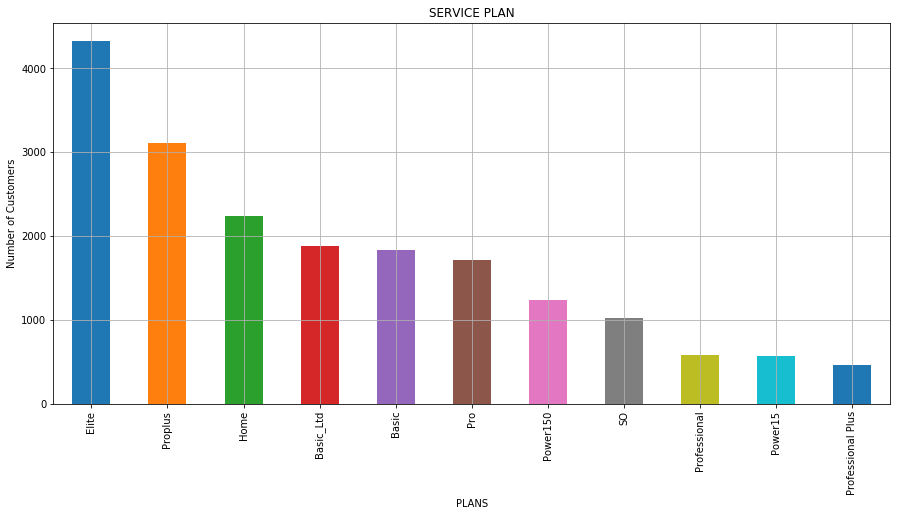

In [60]:
plt.figure(figsize=(15,7))
data['SERVICE_PLAN'].value_counts().plot.bar()
plt.title("SERVICE PLAN")
plt.xlabel("PLANS")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

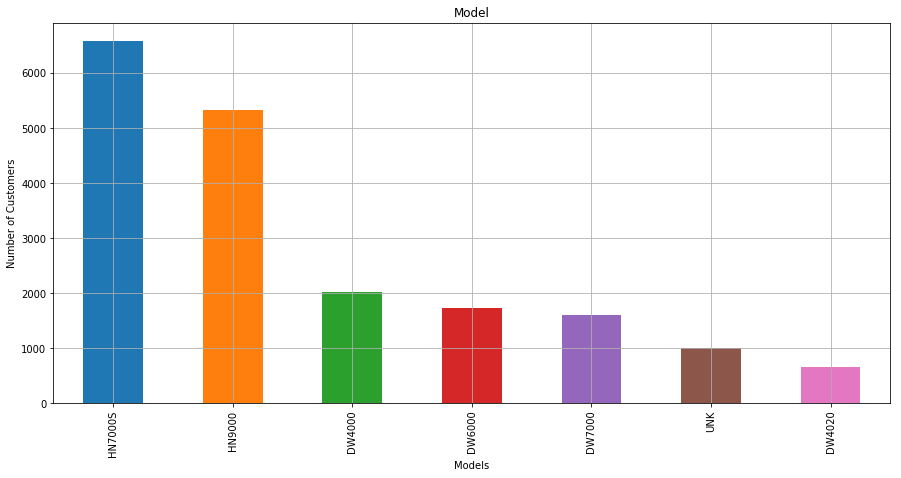

In [62]:
plt.figure(figsize=(15,7))
data["MODEL"].value_counts().plot.bar()
plt.title("Model")
plt.xlabel("Models")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

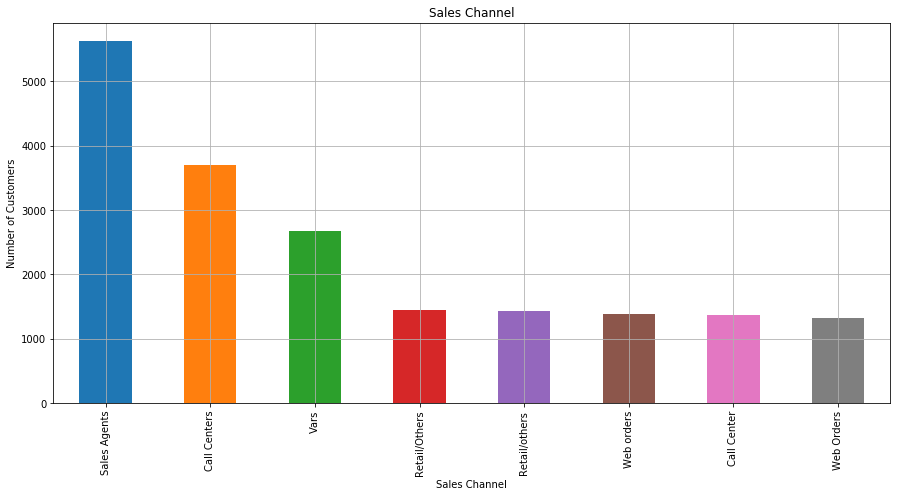

In [63]:
plt.figure(figsize=(15,7))
data["SALES_CHANNEL"].value_counts().plot.bar()
plt.title("Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

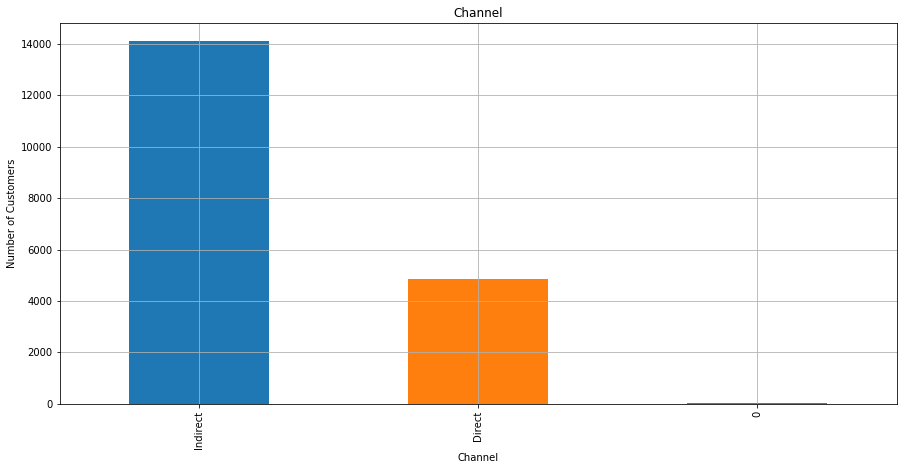

In [64]:
plt.figure(figsize=(15,7))
data["DIRECT_INDIRECT_CHANNEL"].value_counts().plot.bar()
plt.title("Channel")
plt.xlabel("Channel")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

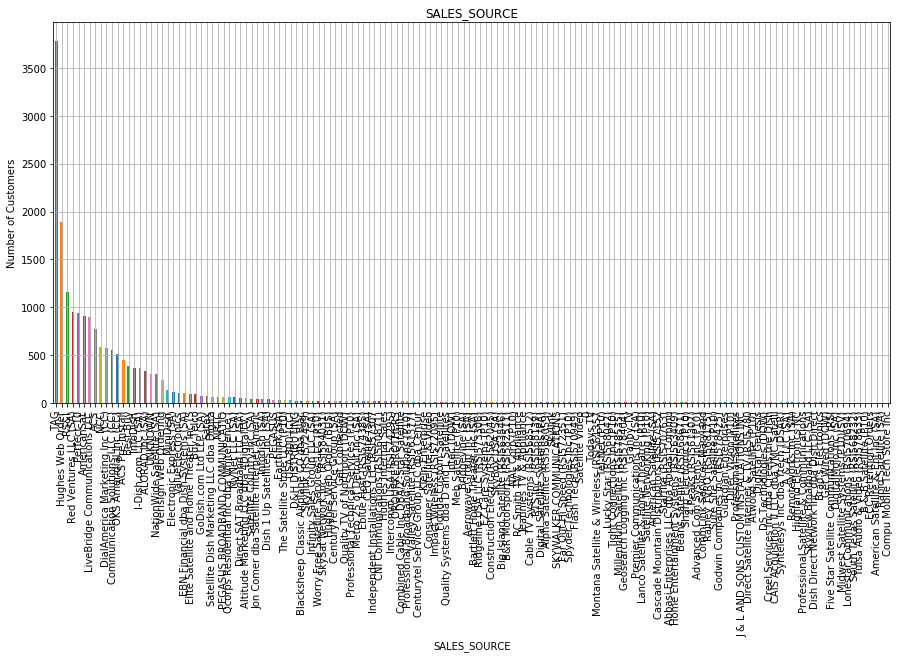

In [65]:
plt.figure(figsize=(15,7))
data["SALES_SOURCE"].value_counts().plot.bar()
plt.title("SALES_SOURCE")
plt.xlabel("SALES_SOURCE")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

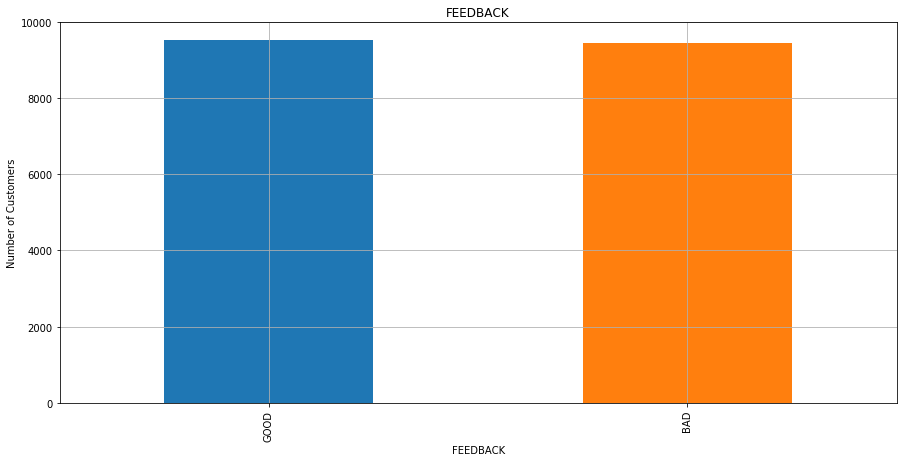

In [66]:
plt.figure(figsize=(15,7))
data["FEEDBACK"].value_counts().plot.bar()
plt.title("FEEDBACK")
plt.xlabel("FEEDBACK")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

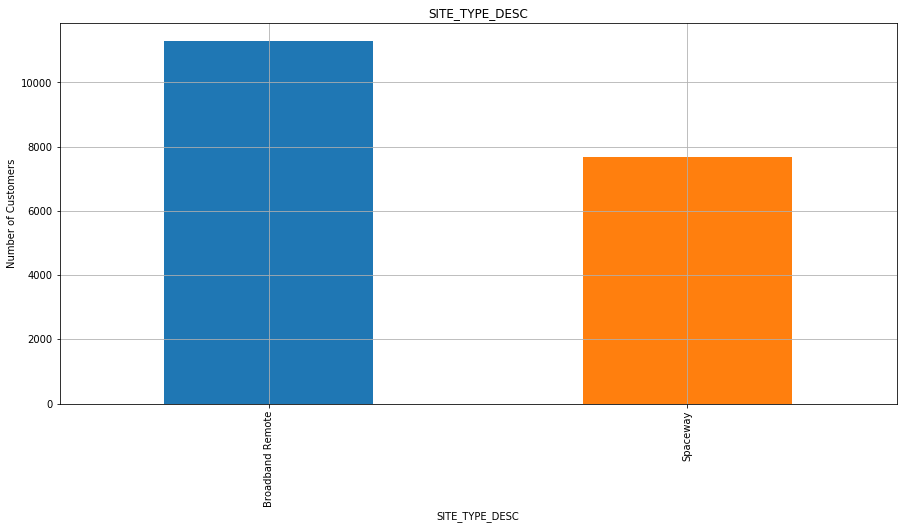

In [67]:
plt.figure(figsize=(15,7))
data['SITE_TYPE_DESC'].value_counts().plot.bar()
plt.title("SITE_TYPE_DESC")
plt.xlabel("SITE_TYPE_DESC")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

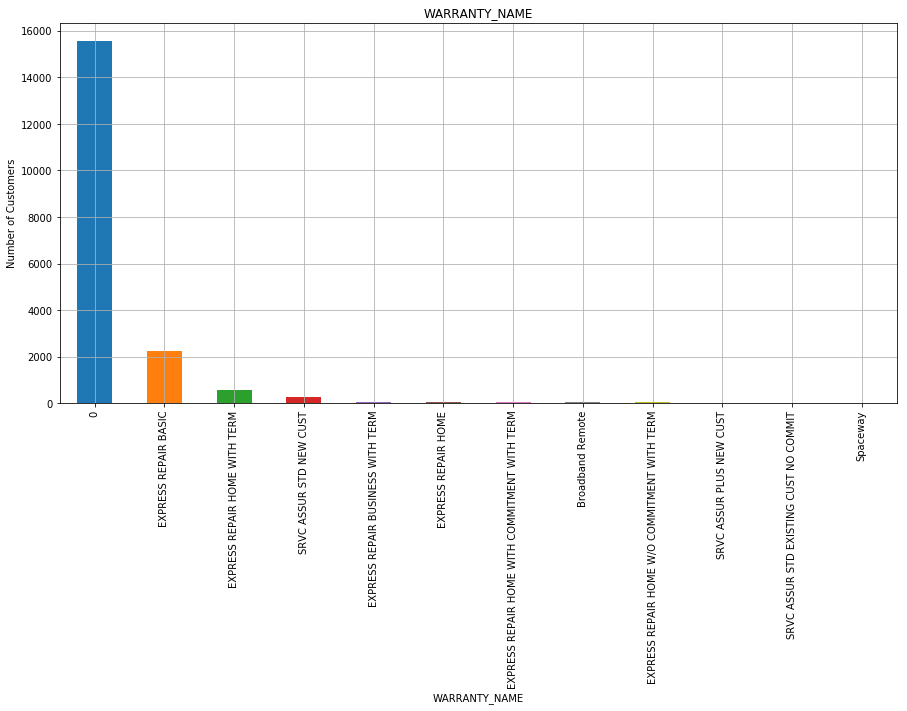

In [68]:
plt.figure(figsize=(15,7))
data["WARRANTY_NAME"].value_counts().plot.bar()
plt.title("WARRANTY_NAME")
plt.xlabel("WARRANTY_NAME")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

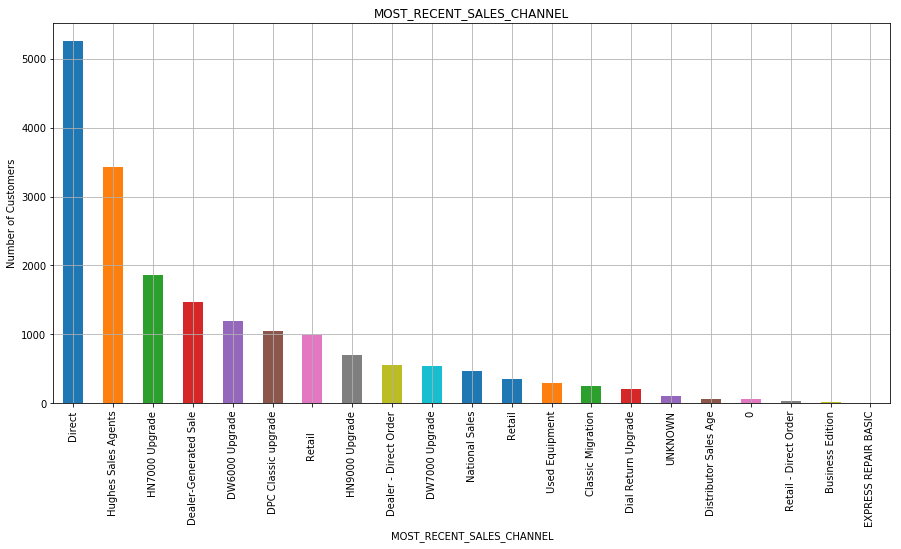

In [69]:
plt.figure(figsize=(15,7))
data["MOST_RECENT_SALES_CHANNEL"].value_counts().plot.bar()
plt.title("MOST_RECENT_SALES_CHANNEL")
plt.xlabel("MOST_RECENT_SALES_CHANNEL")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

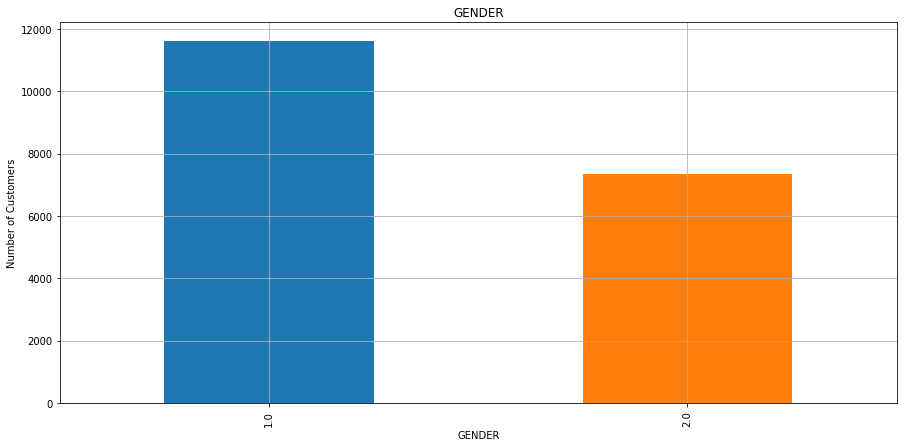

In [70]:
plt.figure(figsize=(15,7))
data['GENDER'].value_counts().plot.bar()
plt.title("GENDER")
plt.xlabel("GENDER")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

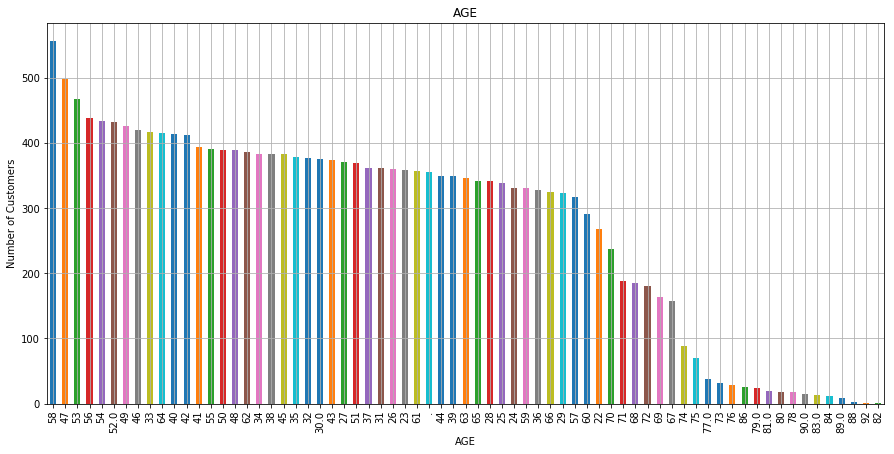

In [71]:
plt.figure(figsize=(15,7))
data['AGE'].value_counts().plot.bar()
plt.title("AGE")
plt.xlabel("AGE")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

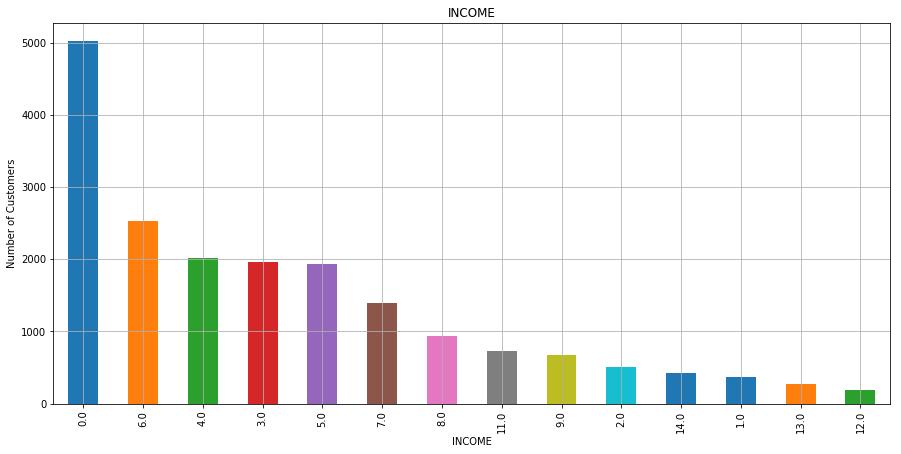

In [72]:
plt.figure(figsize=(15,7))
data['INCOME'].value_counts().plot.bar()
plt.title("INCOME")
plt.xlabel("INCOME")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

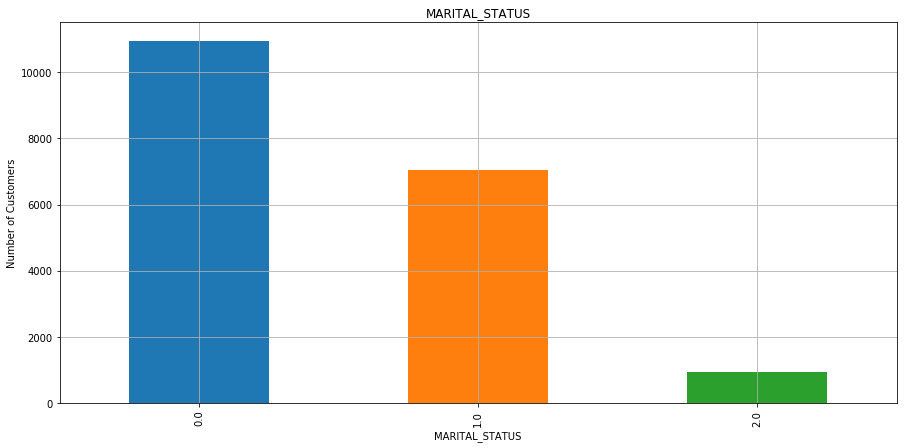

In [73]:
plt.figure(figsize=(15,7))
data['MARITAL_STATUS'].value_counts().plot.bar()
plt.title("MARITAL_STATUS")
plt.xlabel("MARITAL_STATUS")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

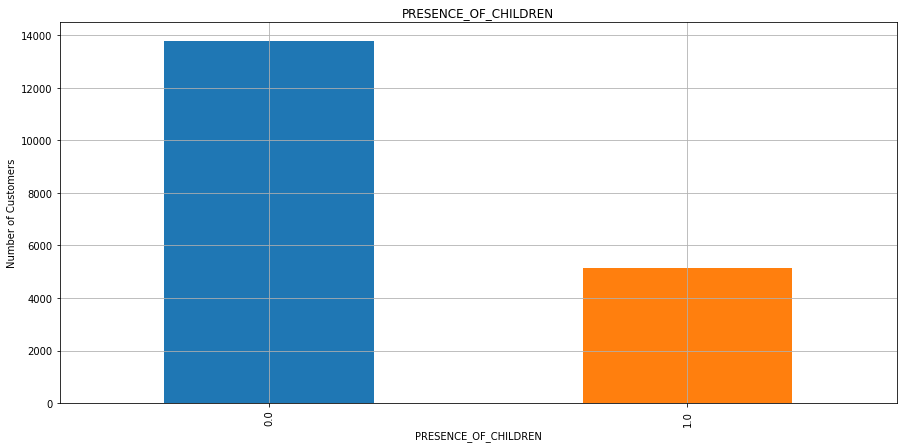

In [74]:
plt.figure(figsize=(15,7))
data['PRESENCE_OF_CHILDREN'].value_counts().plot.bar()
plt.title("PRESENCE_OF_CHILDREN")
plt.xlabel("PRESENCE_OF_CHILDREN")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

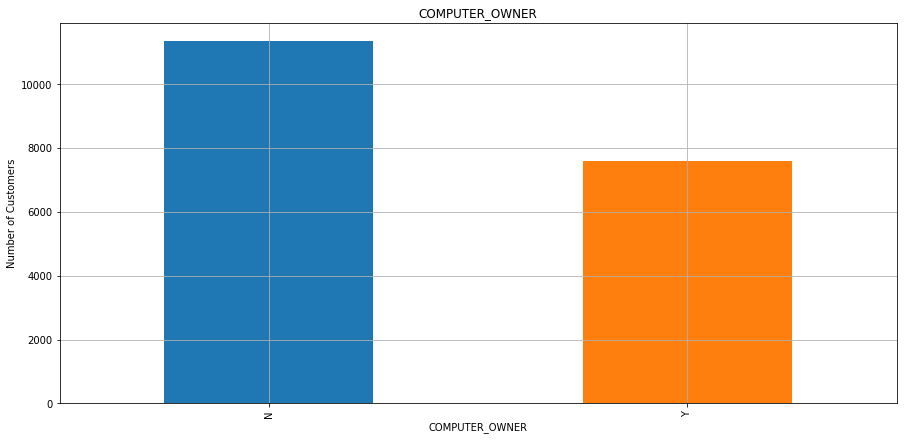

In [75]:
plt.figure(figsize=(15,7))
data['COMPUTER_OWNER'].value_counts().plot.bar()
plt.title("COMPUTER_OWNER")
plt.xlabel("COMPUTER_OWNER")
plt.ylabel("Number of Customers")
plt.grid()
plt.show()

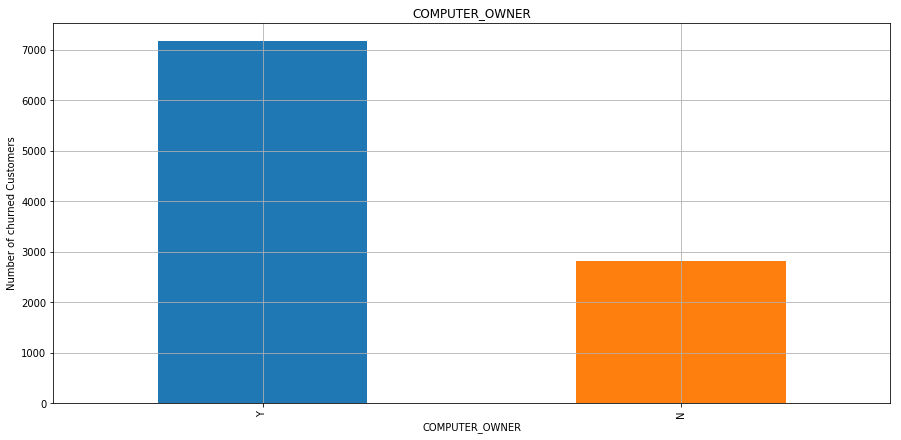

In [76]:
plt.figure(figsize=(15,7))
churneddata["COMPUTER_OWNER"].value_counts().plot.bar()
plt.title("COMPUTER_OWNER")
plt.xlabel("COMPUTER_OWNER")
plt.ylabel("Number of churned Customers")
plt.grid()
plt.show()

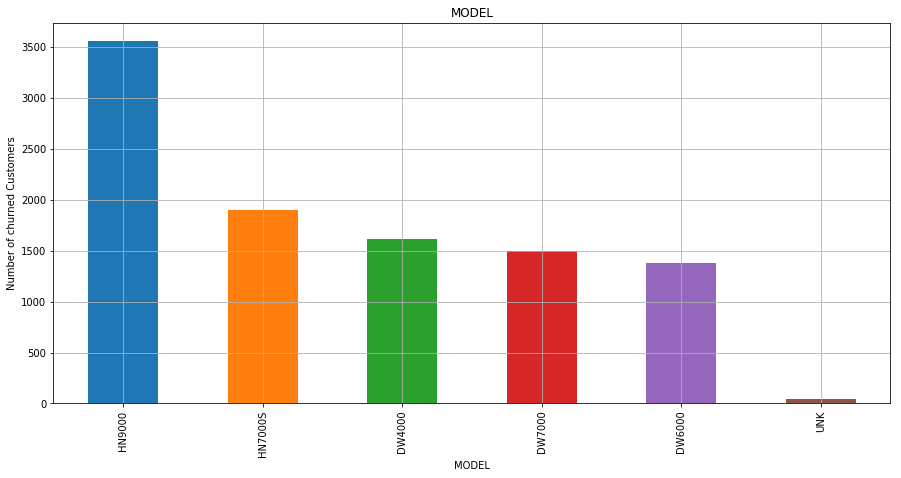

In [77]:
plt.figure(figsize=(15,7))
churneddata["MODEL"].value_counts().plot.bar()
plt.title("MODEL")
plt.xlabel("MODEL")
plt.ylabel("Number of churned Customers")
plt.grid()
plt.show()

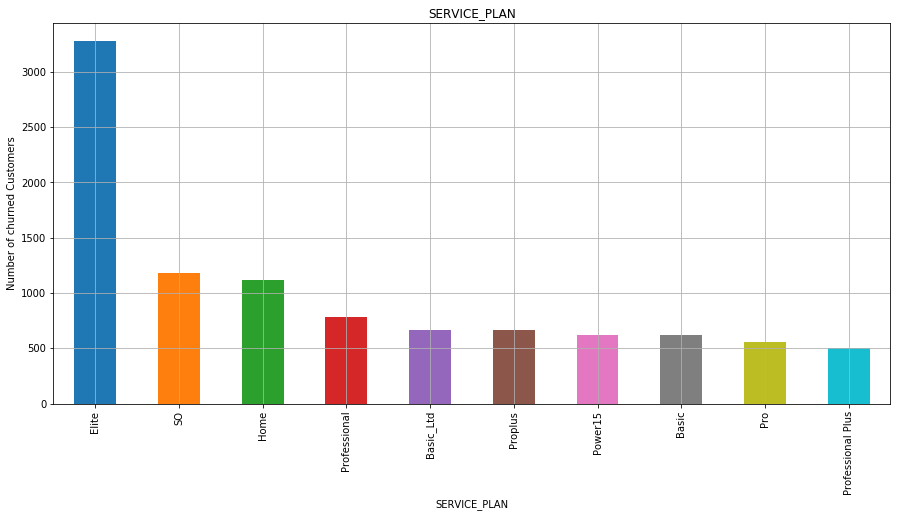

In [78]:
plt.figure(figsize=(15,7))
churneddata["SERVICE_PLAN"].value_counts().plot.bar()
plt.title("SERVICE_PLAN")
plt.xlabel("SERVICE_PLAN")
plt.ylabel("Number of churned Customers")
plt.grid()
plt.show()

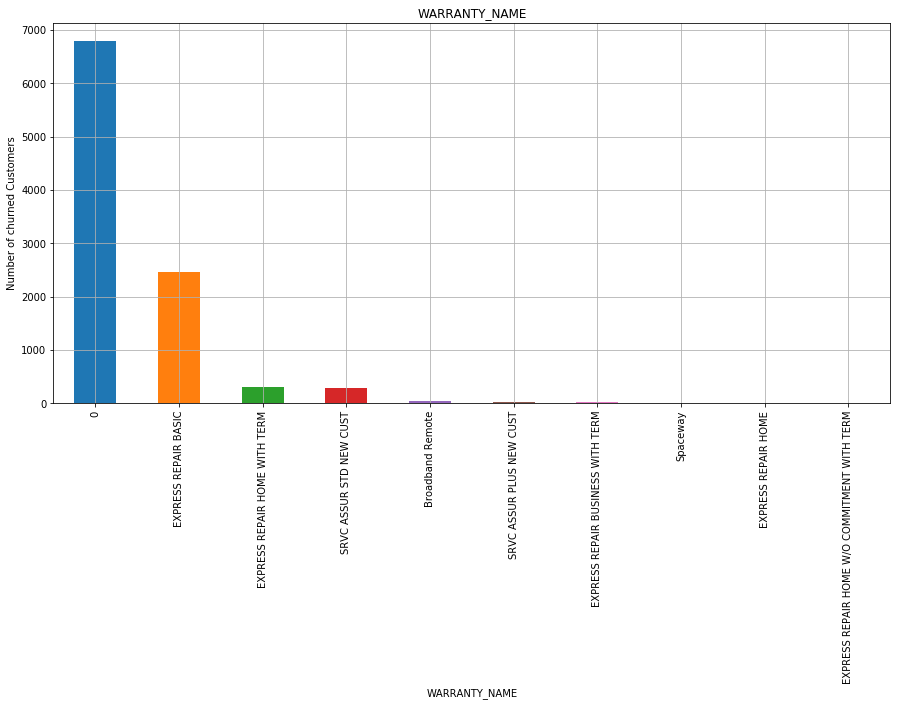

In [79]:
plt.figure(figsize=(15,7))
churneddata["WARRANTY_NAME"].value_counts().plot.bar()
plt.title("WARRANTY_NAME")
plt.xlabel("WARRANTY_NAME")
plt.ylabel("Number of churned Customers")
plt.grid()
plt.show()

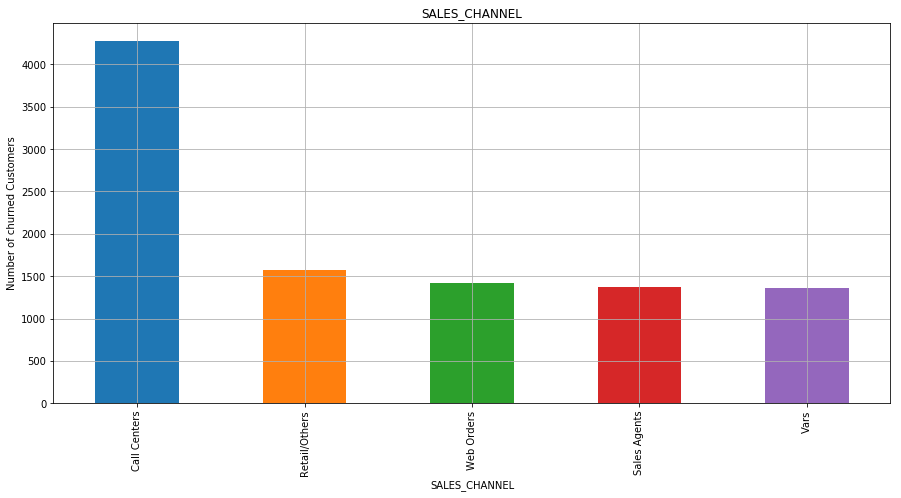

In [80]:
plt.figure(figsize=(15,7))
churneddata["SALES_CHANNEL"].value_counts().plot.bar()
plt.title("SALES_CHANNEL")
plt.xlabel("SALES_CHANNEL")
plt.ylabel("Number of churned Customers")
plt.grid()
plt.show()

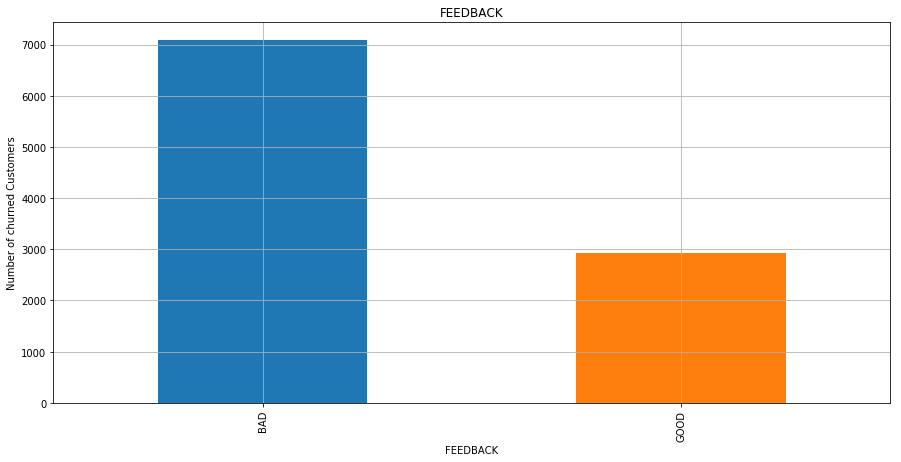

In [81]:
plt.figure(figsize=(15,7))
churneddata["FEEDBACK"].value_counts().plot.bar()
plt.title("FEEDBACK")
plt.xlabel("FEEDBACK")
plt.ylabel("Number of churned Customers")
plt.grid()
plt.show()

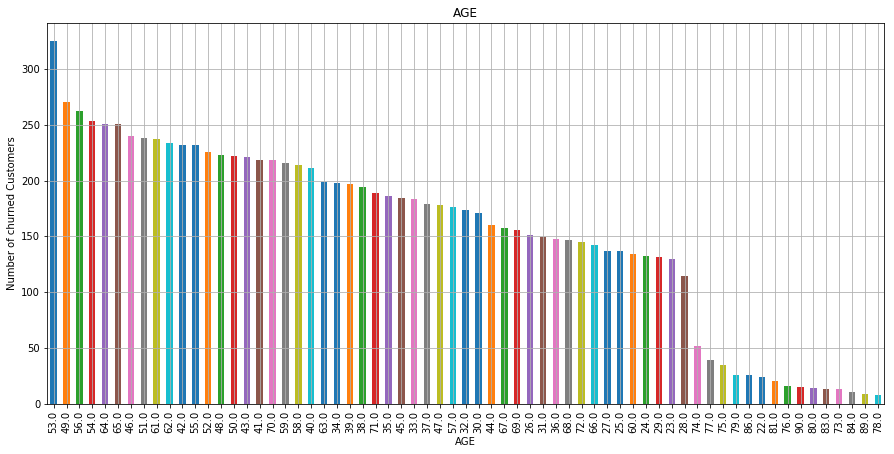

In [82]:
plt.figure(figsize=(15,7))
churneddata["AGE"].value_counts().plot.bar()
plt.title("AGE")
plt.xlabel("AGE")
plt.ylabel("Number of churned Customers")
plt.grid()
plt.show()

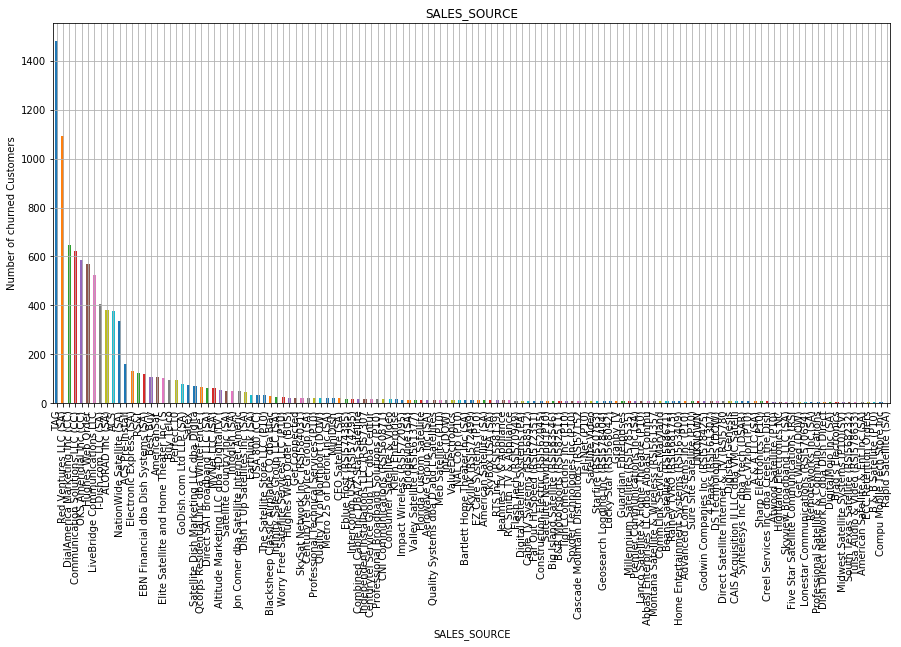

In [83]:
plt.figure(figsize=(15,7))
churneddata["SALES_SOURCE"].value_counts().plot.bar()
plt.title("SALES_SOURCE")
plt.xlabel("SALES_SOURCE")
plt.ylabel("Number of churned Customers")
plt.grid()
plt.show()

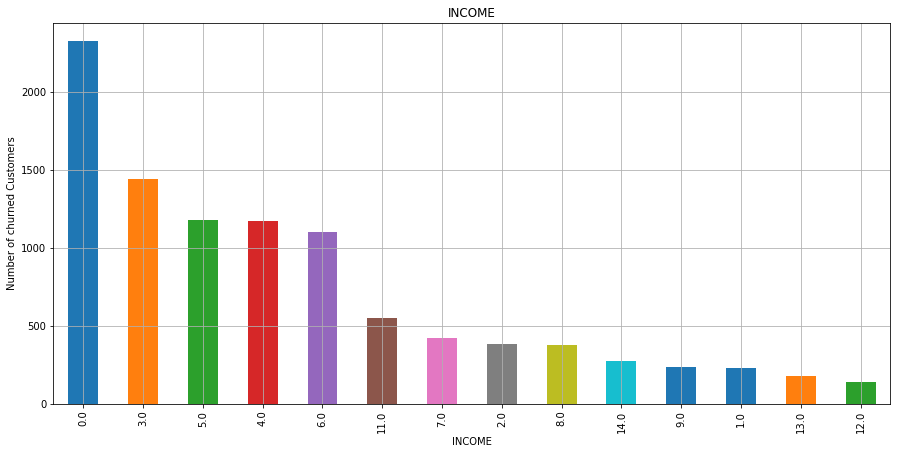

In [84]:
plt.figure(figsize=(15,7))
churneddata["INCOME"].value_counts().plot.bar()
plt.title("INCOME")
plt.xlabel("INCOME")
plt.ylabel("Number of churned Customers")
plt.grid()
plt.show()

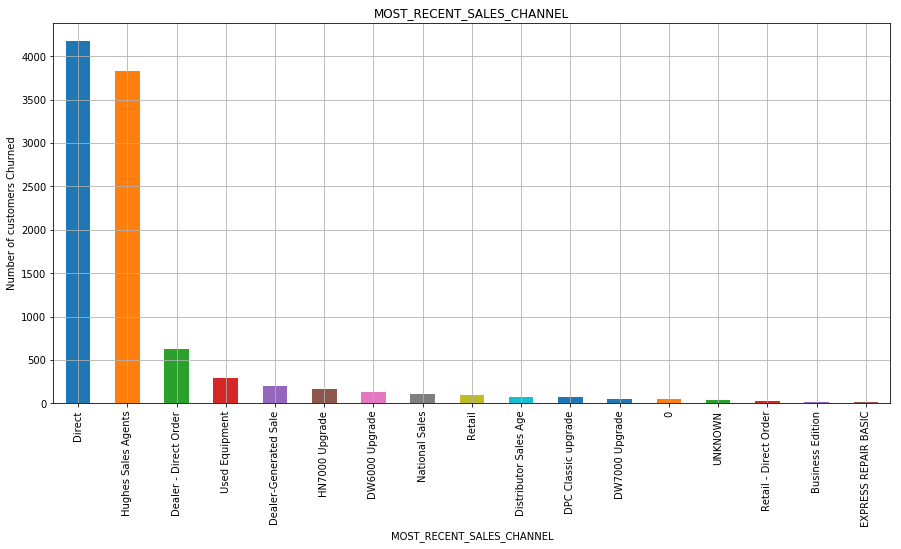

In [85]:
plt.figure(figsize=(15,7))
churneddata["MOST_RECENT_SALES_CHANNEL"].value_counts().plot.bar()
plt.title("MOST_RECENT_SALES_CHANNEL")
plt.xlabel("MOST_RECENT_SALES_CHANNEL")
plt.ylabel("Number of customers Churned")
plt.grid()
plt.show()

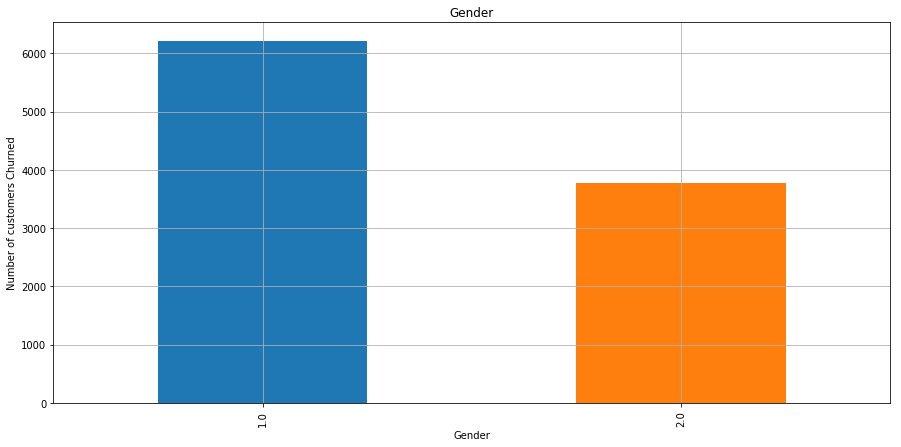

In [86]:
plt.figure(figsize=(15,7))
churneddata["GENDER"].value_counts().plot.bar()
plt.title("Gender")
plt.xlabel("Gender")
plt.ylabel("Number of customers Churned")
plt.grid()
plt.show()

In [88]:
#Removing the redundant columns
data.drop(['SALES_SOURCE','SATELLITE','MOST_RECENT_SALES_CHANNEL'],axis=1,inplace=True)

KeyError: "labels ['SALES_SOURCE' 'SATELLITE' 'MOST_RECENT_SALES_CHANNEL'] not contained in axis"

In [89]:
#Extracting our target variable, ACCOUNT_STATUS as "y"
y=data['ACCOUNT_STATUS'].copy()

In [90]:
#Creating dummy variables
temp=pd.get_dummies(data['COMPUTER_OWNER'],prefix='COMPUTER_OWNER')
data=data.join(temp)

temp=pd.get_dummies(data['SERVICE_PLAN'],prefix='SERVICE_PLAN')
data=data.join(temp)

temp=pd.get_dummies(data['MODEL'],prefix='MODEL')
data=data.join(temp)

temp=pd.get_dummies(data['SALES_CHANNEL'],prefix='SALES_CHANNEL')
data=data.join(temp)

temp=pd.get_dummies(data['DIRECT_INDIRECT_CHANNEL'],prefix='DIRECT_INDIRECT_CHANNEL')
data=data.join(temp)

temp=pd.get_dummies(data['SITE_TYPE_DESC'],prefix='SITE_TYPE_DESC')
data=data.join(temp)

temp=pd.get_dummies(data['WARRANTY_NAME'],prefix='WARRANTY_NAME')
data=data.join(temp)

temp=pd.get_dummies(data['FEEDBACK'],prefix='FEEDBACK')
data=data.join(temp)

In [91]:
#Removing columns for which dummy variables have been created
data.drop(['FEEDBACK','COMPUTER_OWNER','ACCOUNT_STATUS','SERVICE_PLAN','MODEL','SALES_CHANNEL','DIRECT_INDIRECT_CHANNEL','SITE_TYPE_DESC','WARRANTY_NAME'],axis=1,inplace=True)

In [92]:
data.AGE=data.AGE.replace('.',data[~(data.AGE==".")].AGE.mean())

In [93]:
data["SALES_CHANNEL_Retail/Others"]=data["SALES_CHANNEL_Retail/Others"]+data["SALES_CHANNEL_Retail/Others"]
data["SALES_CHANNEL_Web Orders"]=data["SALES_CHANNEL_Web Orders"]+data["SALES_CHANNEL_Web orders"]

In [94]:
data=data.drop(columns=["SALES_CHANNEL_Retail/others","SALES_CHANNEL_Web orders","SITE_ACCOUNT_NUMBER","UPGRADE_DATE"])

In [95]:
#Replacing "Active" status with 1 and "Closed"/"Inactive" with 2 for the target variable
y=y.replace('Active',1)
y=y.replace('Closed',2)
y=y.replace('Inactive',2) #Since number of inactive accounts very few hence including them with closed accounts

In [ ]:
#Modeling

In [96]:
x_train, x_test, y_train, y_test= train_test_split(data,y,test_size=0.2,random_state=0)

In [97]:
names=[
    "Nearest Neighbors", 
    "Linear SVM", 
    "RBF SVM", 
    "Decision Tree",
    "Random Forest", 
    "AdaBoost",
    "Linear Discriminant Analysis",
    "Logistic Regression"
    ]

classifiers=[
    KNeighborsClassifier(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma='auto', C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=500),
    AdaBoostClassifier(),
    LinearDiscriminantAnalysis(),
    LogisticRegression()
    ]

In [98]:
for i,j in zip(names,classifiers):
    j.fit(x_train,y_train)
    
    score = j.score(x_test,y_test)
    ypred=j.predict(x_test)    
    cv_acc=cross_val_score(estimator=j,X=x_train,y=y_train,cv=5)
    cm=confusion_matrix(y_test,ypred)
    cv_acc=cv_acc.mean()
    acc=accuracy_score(y_test,ypred)
        
    print("+"*100)
    print("\n Classifier is \n" + str(i))
    print("\n Score \n" + str(score*100) + "%")
    print('\n Confusion Matrix \n',cm)
    print('\n Cross Validation Score \n',cv_acc)
    print('\n Testing Accuracy \n',acc)
    
    if i=="AdaBoost":
        feature_importances=pd.DataFrame(j.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
        print(feature_importances)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Nearest Neighbors

 Score 
91.34792930625166%

 Confusion Matrix 
 [[1844   99]
 [ 229 1619]]

 Cross Validation Score 
 0.9122871334054098

 Testing Accuracy 
 0.9134792930625165
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Linear SVM

 Score 
95.62120812450542%

 Confusion Matrix 
 [[1889   54]
 [ 112 1736]]

 Cross Validation Score 
 0.9537694836616856

 Testing Accuracy 
 0.9562120812450541
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
RBF SVM

 Score 
95.19915589554208%

 Confusion Matrix 
 [[1875   68]
 [ 114 1734]]

 Cross Validation Score 
 0.9504064767378478

 Testing Accuracy 
 0.9519915589554208
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Decis

C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SESA475934\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\SESA475934\AppData\Local\Contin

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Linear Discriminant Analysis

 Score 
95.17277763123187%

 Confusion Matrix 
 [[1896   47]
 [ 136 1712]]

 Cross Validation Score 
 0.9515933333355088

 Testing Accuracy 
 0.9517277763123186
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

 Classifier is 
Logistic Regression

 Score 
95.67396465312582%

 Confusion Matrix 
 [[1881   62]
 [ 102 1746]]

 Cross Validation Score 
 0.9601665741508534

 Testing Accuracy 
 0.9567396465312582


In [ ]:
#As observed, here AdaBoost yields best accuracy. 
#Adaboost model also give sus the importance of each feature
#Using that we can alter the number of features to make the model better.

In [ ]:
data=data[["INCOME","AGE","SALES_CHANNEL_Web Orders","SALES_CHANNEL_Vars","SALES_CHANNEL_Call Center","MODEL_UNK","SERVICE_PLAN_Elite","SALES_CHANNEL_Sales Agents","MODEL_HN7000S","SERVICE_PLAN_Proplus","FEEDBACK_GOOD","MARITAL_STATUS","MODEL_DW7000","SITE_TYPE_DESC_Spaceway","SERVICE_PLAN_Power15","PRESENCE_OF_CHILDREN","SALES_CHANNEL_Retail/Others","SALES_CHANNEL_Call Centers","COMPUTER_OWNER_Y","WARRANTY_NAME_EXPRESS REPAIR BASIC","SERVICE_PLAN_Basic","WARRANTY_NAME_SRVC ASSUR STD NEW CUST","MODEL_DW4020","MODEL_DW4000","SERVICE_PLAN_SO","SERVICE_PLAN_Basic_Ltd","SERVICE_PLAN_Professional Plus","SERVICE_PLAN_Professional","SERVICE_PLAN_Power150"]]

In [99]:
#Re-Modeling
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.2,random_state=0)

In [100]:
model=AdaBoostClassifier()
model.fit(x_train,y_train)
score = model.score(x_test,y_test)
feature_importances=pd.DataFrame(model.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print("Score \n" + str(score*100) + "%")
print(feature_importances)

Score 
95.80585597467687%
                                                    importance
INCOME                                                    0.10
AGE                                                       0.10
SALES_CHANNEL_Web Orders                                  0.08
SALES_CHANNEL_Call Center                                 0.06
SALES_CHANNEL_Vars                                        0.06
MODEL_UNK                                                 0.04
SERVICE_PLAN_Elite                                        0.04
SERVICE_PLAN_Proplus                                      0.04
MODEL_HN7000S                                             0.04
SALES_CHANNEL_Sales Agents                                0.04
MODEL_DW4000                                              0.02
SALES_CHANNEL_Retail/Others                               0.02
SALES_CHANNEL_Call Centers                                0.02
SITE_TYPE_DESC_Broadband Remote                           0.02
WARRANTY_NAME_EXPRESS REPAIR 

In [ ]:
#Insights:
#1. Maximum number of customers have Service plan Elite, followed by Proplus.
#Churn for Elite customers are at least 2.5 times more as compared to any other Service plan. 

#2. Sales Agents are the Sales Channel for maximum customer base,
#though maximum churn is observed for customers acquired via Call Centres.

#3. We've received equal number of good and bad feedback reviews, though,
#as obvious, churn for people with bad feedback are a lot more than people exiting with a good feedback.

#4. The number of Male customers is almost 1.5 times more in comparison to female customers.

#5. Maximum customers have an annual income less than $10K.

#6. Maximum number of customers do not have children.

#7. About 60% customers do not Own Computer; Churn rate observed for customers 
#with computers is almost 2.5 times the number of customers who do not own computers.